In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams

In [18]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]  # Matplotlib's default figure size
plt.rcParams['figure.autolayout'] = True  # Ensures proper spacing
# Set equal aspect ratio and axis limits in the plotting code instead of rcParams

plt.ioff()


In [19]:
###
"""
with open('data/Real/142_4/142-4mA_20k_10s_3u_10-29.txt', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    lines = file.readlines()
    # Convert each line into list of floats by splitting on tabs
    data = [[float(val) for val in line.strip().split('\t')] for line in lines]
    # Transpose to get columns
    data = list(map(list, zip(*data)))

# Create resampled data taking every 100th point
data_resampled = [column[::100] for column in data]

print(data_resampled)
plt.plot(data_resampled[2], data_resampled[3])  # First two columns are x,y coordinates
plt.show()

lines = np.array(data)

avgx = sum(lines[0] / len(lines[0]))
avgy = sum(lines[1] / len(lines[1]))
dists = np.sqrt((lines[0] - avgx) ** 2 + (lines[1] - avgy) ** 2)
### 
"""


'\nwith open(\'data/Real/142_4/142-4mA_20k_10s_3u_10-29.txt\', mode =\'r\') as file: # "ElsieWiddowsonFileC051.txt"\n    lines = file.readlines()\n    # Convert each line into list of floats by splitting on tabs\n    data = [[float(val) for val in line.strip().split(\'\t\')] for line in lines]\n    # Transpose to get columns\n    data = list(map(list, zip(*data)))\n\n# Create resampled data taking every 100th point\ndata_resampled = [column[::100] for column in data]\n\nprint(data_resampled)\nplt.plot(data_resampled[2], data_resampled[3])  # First two columns are x,y coordinates\nplt.show()\n\nlines = np.array(data)\n\navgx = sum(lines[0] / len(lines[0]))\navgy = sum(lines[1] / len(lines[1]))\ndists = np.sqrt((lines[0] - avgx) ** 2 + (lines[1] - avgy) ** 2)\n### \n'

Processing data/Real/xyscan\392-9mA_yy.txt:
[[0.202274, 0.20326, 0.202274, 0.202932, 0.202603, 0.202274, 0.20326, 0.201946, 0.202603, 0.202274, 0.202274, 0.202274, 0.201946, 0.202274, 0.201946, 0.202603, 0.202932, 0.202603, 0.202932, 0.202603, 0.202932, 0.202603, 0.202603, 0.202932, 0.202932, 0.202603, 0.202932, 0.202932, 0.202932, 0.202603, 0.202274, 0.202932, 0.202274, 0.202603, 0.202274, 0.20326, 0.202932, 0.202932, 0.202603, 0.202603, 0.201946, 0.202274, 0.202603, 0.202274, 0.201946, 0.202603, 0.202274, 0.202274, 0.202603, 0.202603, 0.202603, 0.202274, 0.202603, 0.202274, 0.202932, 0.202603, 0.202603, 0.202603, 0.202603, 0.202274, 0.202932, 0.20326, 0.202932, 0.202932, 0.20326, 0.20326, 0.203589, 0.202603, 0.202932, 0.20326, 0.203589, 0.203589, 0.202932, 0.20326, 0.203589, 0.203589, 0.203917, 0.20326, 0.203589, 0.203589, 0.203589, 0.203589, 0.204246, 0.203589, 0.204246, 0.203917, 0.203917, 0.204574, 0.204246, 0.203917, 0.203589, 0.204574, 0.204246, 0.204574, 0.204246, 0.204574, 0.2

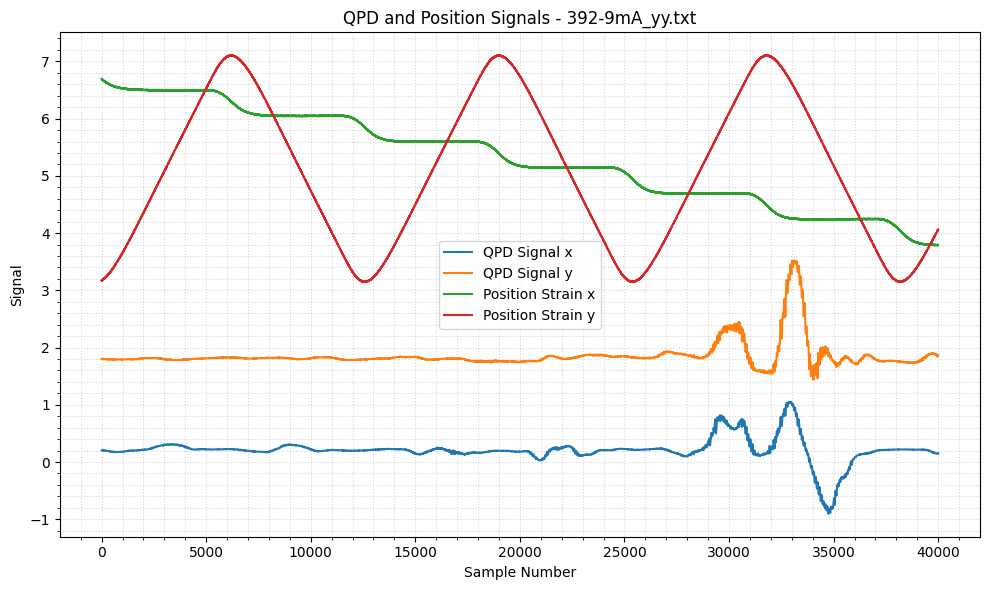

Fit parameters: gradient=4.573153049422158, intercept=-25.770127060225388


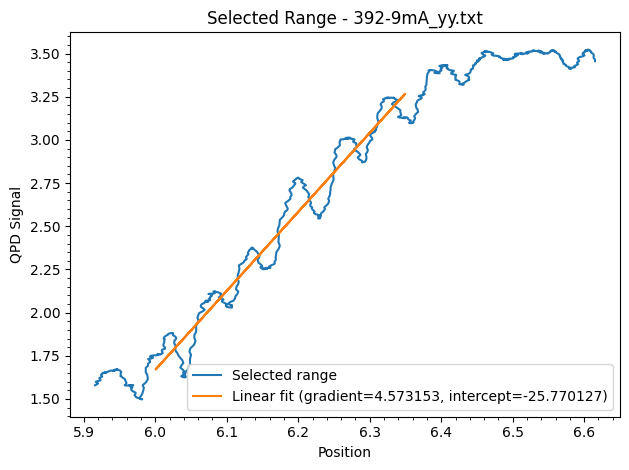

[[ 0.00213652 -0.0131939 ]
 [-0.0131939   0.08149992]]


In [20]:
import os
import glob
import pandas as pd

# Get all txt files in xyscan directory, excluding Settings files
# specify if we want x or y based on exclusions
currents = [392]#, [100, 142, 193, 292, 392, 493]  # List of currents to process, 
xyscan_files = []
# Check x first
for current in currents:
    xyscan_files.extend([f for f in glob.glob(f'data/Real/xyscan/{current}-*.txt')
                        if not (f.endswith('Settingsx.txt') or f.endswith('Settingsy.txt') or 
                               f.endswith('SettingsX.txt') or f.endswith('SettingsY.txt') or f.endswith('xx.txt') or f.endswith('XX.txt'))])

for filename in xyscan_files:
    with open(filename, mode='r') as file:
        lines = file.readlines()
        # Convert each line into list of floats by splitting on tabs
        data = [[float(val) for val in line.strip().split('\t')] for line in lines]
        # Transpose to get columns 
        data = list(map(list, zip(*data)))
    data_resampled = [column[::5] for column in data]

    print(f"Processing {filename}:")
    print(data)

    def linear_fit(x, m, c):
        return m*np.array(x) + c
    # Create sample number array for x-axis
    samples = range(len(data_resampled[0]))
    
    # Plot QPD and position signals vs sample number
    plt.figure(figsize=(10,6))
    plt.plot(samples, data_resampled[0], label='QPD Signal x')
    plt.plot(samples, data_resampled[1], label='QPD Signal y')
    plt.plot(samples, data_resampled[2], label='Position Strain x')
    plt.plot(samples, data_resampled[3], label='Position Strain y')

    plt.grid(True, which='both', linestyle=':', alpha=0.5)

    plt.xlabel('Sample Number')
    plt.ylabel('Signal')
    plt.title(f'QPD and Position Signals - {os.path.basename(filename)}')
    plt.legend()
    plt.minorticks_on()
    plt.show()
    # Select range for fitting
    idx1 = 33000
    idx2 = 34000
    range1_qpd = data_resampled[1][idx1:idx2]
    range1_pos = data_resampled[3][idx1:idx2]




    plt.plot(range1_pos, range1_qpd, label='Selected range')
        # Create DataFrame with QPD and position data
    df = pd.DataFrame({
        'qpd': range1_qpd,
        'position': range1_pos
    })
    
    # Filter data to keep only positions between 4.2 and 4.6
    filtered_df = df[(df['position'] > 6.0) & (df['position'] < 6.35)]
    
    # Update the ranges for fitting with filtered data
    range1_qpd = filtered_df['qpd'].values
    range1_pos = filtered_df['position'].values

    # Perform linear fit on selected range
    popt, pcov = opt.curve_fit(linear_fit, range1_pos, range1_qpd, p0=(-0.5, 1))
    print(f"Fit parameters: gradient={popt[0]}, intercept={popt[1]}")
    
    # Plot fit line
    plt.plot(range1_pos, linear_fit(range1_pos, *popt), 
             label=f'Linear fit (gradient={popt[0]:.6f}, intercept={popt[1]:.6f})')
    plt.minorticks_on()


    plt.xlabel('Position')
    plt.ylabel('QPD Signal')
    plt.title(f'Selected Range - {os.path.basename(filename)}')
    plt.legend()
    plt.show()
    print(pcov)


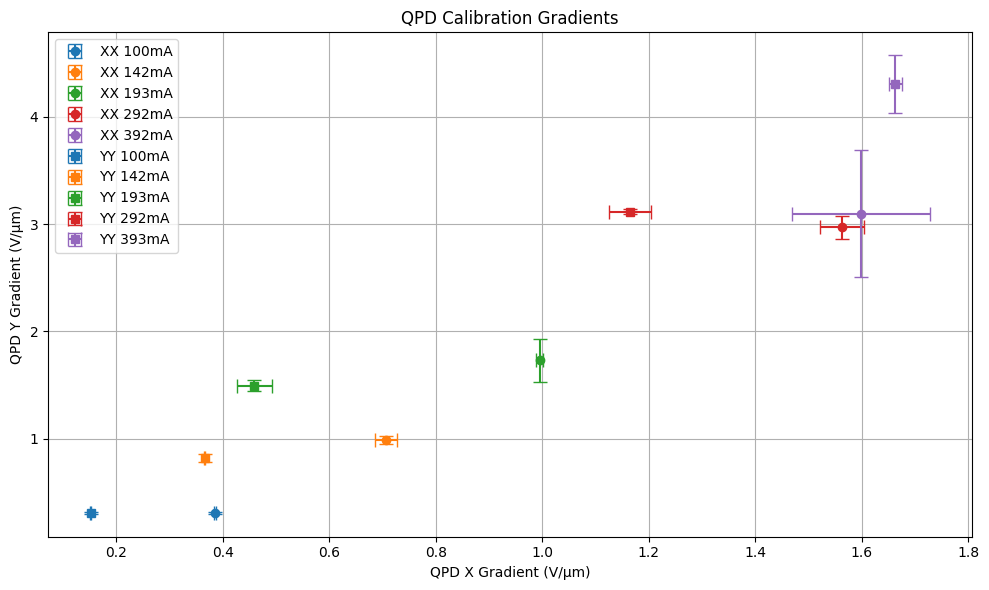

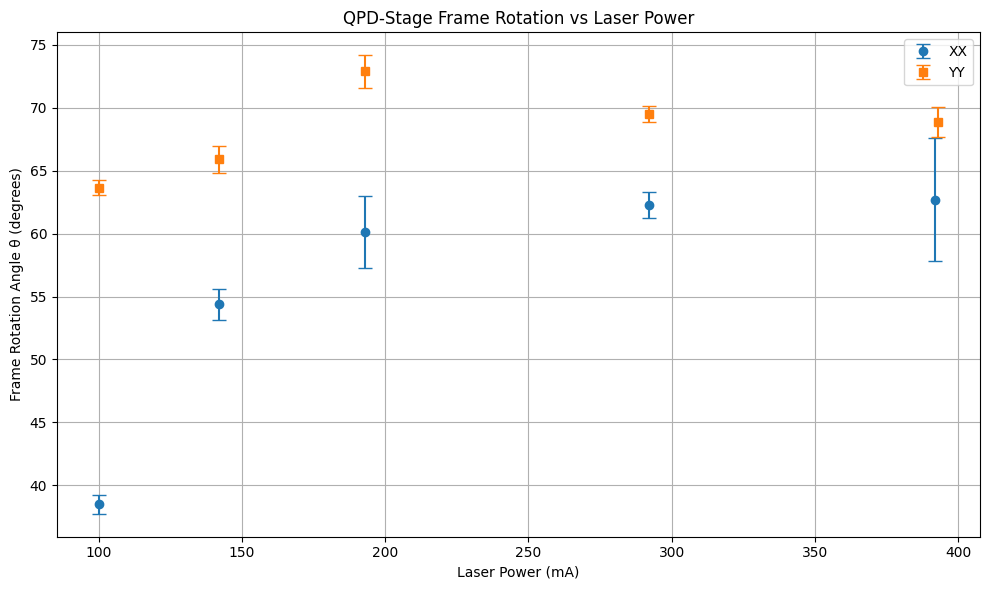

In [21]:
# manual import of data
import pandas as pd
# QPD calib data
scaling_factor = 1 # 50 for downsampling, divide by 20000Hz sample rate
# XX 
xx = {'100': (0.385, 0.306, 0.002, 0.008), '142': (0.707, 0.987, 0.021, 0.034), '193': (0.995, 1.73, 0.007, 0.2), '292': (1.563, 2.971 , 0.041, 0.107), '392': (1.598,3.097, 0.130, 0.594), '492':(3.442, 2.83, 0.2, 0.2)}
xx_series = pd.Series(data=xx) 
yy = {'100': (0.152, .307, 0.001, 0.008), '142': (0.366, 0.818, 0.001 ,0.04), '193': (.459, 1.491, 0.033,.051), '292': (1.165, 3.115,0.039,	0.022), '393':(1.663, 4.303,.012, 0.271)}
yy_series = pd.Series(data=yy)

# Create scatter plot of QPD calibration gradients
plt.figure(figsize=(10,6))

# Filter out data points above 393mA
xx_filtered = {k: v for k, v in xx.items() if float(k) <= 393}
yy_filtered = {k: v for k, v in yy.items() if float(k) <= 393}

# Extract coordinates and uncertainties from xx series
xx_gradients = np.array([v[0] for v in xx_filtered.values()]) * scaling_factor
xx_qpd = np.array([v[1] for v in xx_filtered.values()]) * scaling_factor
xx_gradient_errs = np.array([v[2] for v in xx_filtered.values()]) * scaling_factor
xx_qpd_errs = np.array([v[3] for v in xx_filtered.values()]) * scaling_factor

# Extract coordinates and uncertainties from yy series  
yy_gradients = np.array([v[0] for v in yy_filtered.values()]) * scaling_factor
yy_qpd = np.array([v[1] for v in yy_filtered.values()]) * scaling_factor
yy_gradient_errs = np.array([v[2] for v in yy_filtered.values()]) * scaling_factor
yy_qpd_errs = np.array([v[3] for v in yy_filtered.values()]) * scaling_factor

# Plot XX data points with error bars
for i, label in enumerate(xx_filtered.keys()):
    plt.errorbar(xx_gradients[i], xx_qpd[i], 
                xerr=xx_gradient_errs[i], yerr=xx_qpd_errs[i],
                label=f'XX {label}mA', color=f'C{i}', 
                fmt='o', capsize=5)

# Plot YY data points with error bars
for i, label in enumerate(yy_filtered.keys()):
    plt.errorbar(yy_gradients[i], yy_qpd[i],
                xerr=yy_gradient_errs[i], yerr=yy_qpd_errs[i], 
                label=f'YY {label}mA', color=f'C{i}',
                fmt='s', capsize=5)

plt.xlabel('QPD X Gradient (V/μm)')
plt.ylabel('QPD Y Gradient (V/μm)') 
plt.title('QPD Calibration Gradients')
plt.legend()
plt.grid(True)
plt.show()

# Calculate angle between QPD and stage coordinate frames
# tan(theta) = y/x ratio of gradients
xxtantheta = pd.Series({key: coords[1]/coords[0] for key, coords in xx_filtered.items()})
yytantheta = pd.Series({key: coords[1]/coords[0] for key, coords in yy_filtered.items()})

# Calculate uncertainties in tan(theta) using error propagation
# For f = y/x, δf = f * sqrt((δy/y)^2 + (δx/x)^2)
def ratio_uncertainty(x, y, dx, dy):
    return (y/x) * np.sqrt((dy/y)**2 + (dx/x)**2)

xx_tantheta_errs = pd.Series({
    key: ratio_uncertainty(coords[0], coords[1], coords[2], coords[3]) 
    for key, coords in xx_filtered.items()
})

yy_tantheta_errs = pd.Series({
    key: ratio_uncertainty(coords[0], coords[1], coords[2], coords[3])
    for key, coords in yy_filtered.items() 
})

# Convert tan(theta) to theta in degrees
xxtheta = pd.Series({key: np.arctan(ratio) * 180/np.pi for key, ratio in xxtantheta.items()})
yytheta = pd.Series({key: np.arctan(ratio) * 180/np.pi for key, ratio in yytantheta.items()})

# Propagate uncertainties through arctan
# For θ = arctan(r), δθ = δr/(1 + r^2)  [in radians]
xx_theta_errs = pd.Series({
    key: (xx_tantheta_errs[key]/(1 + xxtantheta[key]**2)) * 180/np.pi
    for key in xx_filtered.keys()
})

yy_theta_errs = pd.Series({
    key: (yy_tantheta_errs[key]/(1 + yytantheta[key]**2)) * 180/np.pi
    for key in yy_filtered.keys()
})

# Create scatter plot of angles vs power with error bars
plt.figure(figsize=(10,6))

# Convert indices to numeric for plotting
xx_powers = pd.to_numeric(xxtheta.index)
yy_powers = pd.to_numeric(yytheta.index)

plt.errorbar(xx_powers, xxtheta.values,
            yerr=xx_theta_errs.values,
            fmt='o', label='XX', capsize=5)
plt.errorbar(yy_powers, yytheta.values, 
            yerr=yy_theta_errs.values,
            fmt='s', label='YY', capsize=5)

plt.xlabel('Laser Power (mA)')
plt.ylabel('Frame Rotation Angle θ (degrees)')
plt.title('QPD-Stage Frame Rotation vs Laser Power')
plt.legend()
plt.grid(True)
plt.show()



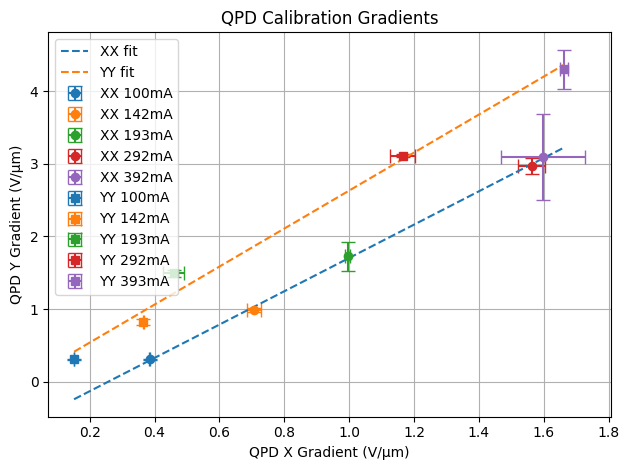

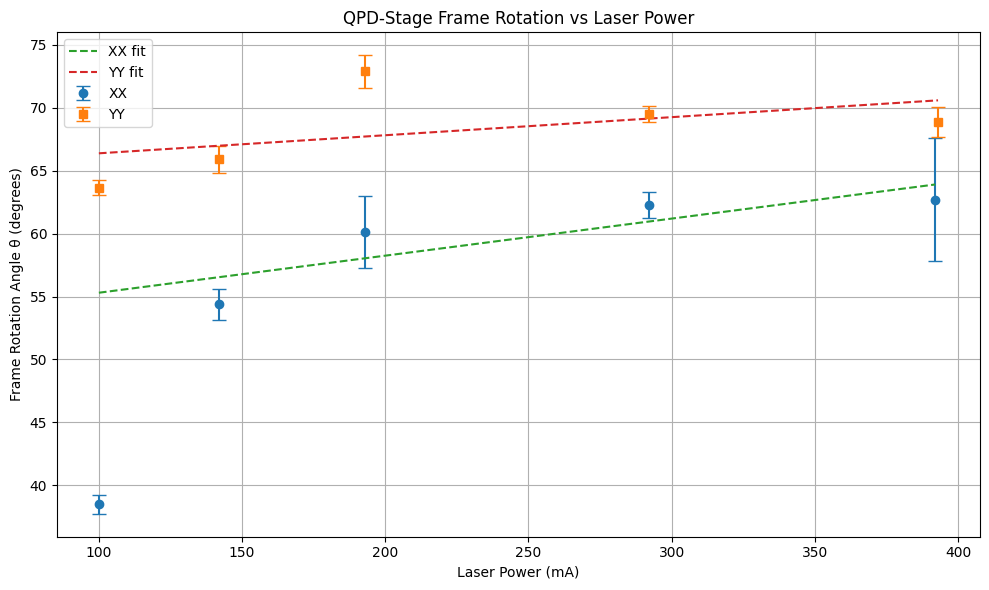

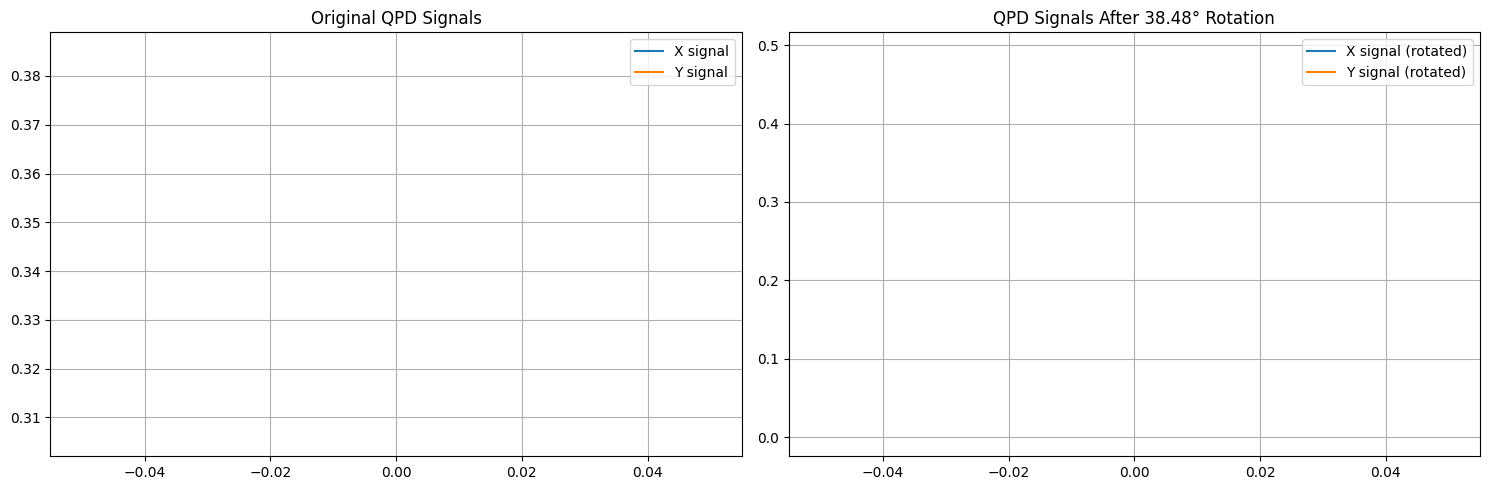

In [22]:
# Plot XX data points with error bars
for i, label in enumerate(xx_filtered.keys()):
    plt.errorbar(xx_gradients[i], xx_qpd[i], 
                xerr=xx_gradient_errs[i], yerr=xx_qpd_errs[i],
                label=f'XX {label}mA', color=f'C{i}', 
                fmt='o', capsize=5)

# Plot YY data points with error bars
for i, label in enumerate(yy_filtered.keys()):
    plt.errorbar(yy_gradients[i], yy_qpd[i],
                xerr=yy_gradient_errs[i], yerr=yy_qpd_errs[i], 
                label=f'YY {label}mA', color=f'C{i}',
                fmt='s', capsize=5)

# Fit lines through gradient data
xx_fit_grad = np.polyfit(xx_gradients, xx_qpd, 1)
yy_fit_grad = np.polyfit(yy_gradients, yy_qpd, 1)
xx_line_grad = np.poly1d(xx_fit_grad)
yy_line_grad = np.poly1d(yy_fit_grad)

# Plot fitted lines for gradients
x_range = np.linspace(min(min(xx_gradients), min(yy_gradients)), 
                     max(max(xx_gradients), max(yy_gradients)), 100)
plt.plot(x_range, xx_line_grad(x_range), '--', label='XX fit')
plt.plot(x_range, yy_line_grad(x_range), '--', label='YY fit')

plt.xlabel('QPD X Gradient (V/μm)')
plt.ylabel('QPD Y Gradient (V/μm)') 
plt.title('QPD Calibration Gradients')
plt.legend()
plt.grid(True)
plt.show()

# Calculate angle between QPD and stage coordinate frames
# tan(theta) = y/x ratio of gradients
xxtantheta = pd.Series({key: coords[1]/coords[0] for key, coords in xx_filtered.items()})
yytantheta = pd.Series({key: coords[1]/coords[0] for key, coords in yy_filtered.items()})

# Calculate uncertainties in tan(theta) using error propagation
# For f = y/x, δf = f * sqrt((δy/y)^2 + (δx/x)^2)
def ratio_uncertainty(x, y, dx, dy):
    return (y/x) * np.sqrt((dy/y)**2 + (dx/x)**2)

xx_tantheta_errs = pd.Series({
    key: ratio_uncertainty(coords[0], coords[1], coords[2], coords[3]) 
    for key, coords in xx_filtered.items()
})

yy_tantheta_errs = pd.Series({
    key: ratio_uncertainty(coords[0], coords[1], coords[2], coords[3])
    for key, coords in yy_filtered.items() 
})

# Convert tan(theta) to theta in degrees
xxtheta = pd.Series({key: np.arctan(ratio) * 180/np.pi for key, ratio in xxtantheta.items()})
yytheta = pd.Series({key: np.arctan(ratio) * 180/np.pi for key, ratio in yytantheta.items()})

# Propagate uncertainties through arctan
# For θ = arctan(r), δθ = δr/(1 + r^2)  [in radians]
xx_theta_errs = pd.Series({
    key: (xx_tantheta_errs[key]/(1 + xxtantheta[key]**2)) * 180/np.pi
    for key in xx_filtered.keys()
})

yy_theta_errs = pd.Series({
    key: (yy_tantheta_errs[key]/(1 + yytantheta[key]**2)) * 180/np.pi
    for key in yy_filtered.keys()
})

# Create scatter plot of angles vs power with error bars
plt.figure(figsize=(10,6))

# Convert indices to numeric for plotting
xx_powers = pd.to_numeric(xxtheta.index)
yy_powers = pd.to_numeric(yytheta.index)

# Plot data points with error bars
plt.errorbar(xx_powers, xxtheta.values,
            yerr=xx_theta_errs.values,
            fmt='o', label='XX', capsize=5)
plt.errorbar(yy_powers, yytheta.values, 
            yerr=yy_theta_errs.values,
            fmt='s', label='YY', capsize=5)

# Fit lines through the data
# For XX, exclude first point (100mA) as it's an outlier
xx_powers_fit = xx_powers[1:]  # Exclude first point
xx_theta_fit = xxtheta.values[1:]  # Exclude first point
xx_fit = np.polyfit(xx_powers_fit, xx_theta_fit, 1)
xx_line = np.poly1d(xx_fit)

# Fit line through YY data
yy_fit = np.polyfit(yy_powers, yytheta.values, 1)
yy_line = np.poly1d(yy_fit)

# Plot fitted lines
plt.plot(xx_powers, xx_line(xx_powers), '--', label='XX fit')
plt.plot(yy_powers, yy_line(yy_powers), '--', label='YY fit')

plt.xlabel('Laser Power (mA)')
plt.ylabel('Frame Rotation Angle θ (degrees)')
plt.title('QPD-Stage Frame Rotation vs Laser Power')
plt.legend()
plt.grid(True)
plt.show()

# Create a function to apply the rotation transformation
def rotate_qpd_signals(x_signal, y_signal, theta_deg):
    """
    Rotate QPD signals by -theta degrees to align with stage frame
    Args:
        x_signal: QPD x signal
        y_signal: QPD y signal 
        theta_deg: Rotation angle in degrees
    Returns:
        x_rot, y_rot: Rotated signals
    """
    # Convert theta to radians
    theta = -np.radians(theta_deg)  # Negative to counter-rotate
    
    # Rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    
    # Stack x,y signals and rotate
    signals = np.vstack((x_signal, y_signal))
    rotated = np.dot(R, signals)
    
    return rotated[0], rotated[1]

# Test the transformation on some example data
# Let's use the first power setting from XX data as an example
power = '100'  # or whichever power you want to test
theta = xxtheta[power]

# Get original x,y QPD signals
x_orig = xx_filtered[power][0]  # x QPD signal
y_orig = xx_filtered[power][1]  # y QPD signal

# Apply rotation transformation
x_rot, y_rot = rotate_qpd_signals(x_orig, y_orig, theta)

# Plot original vs rotated signals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original signals
ax1.plot(x_orig, label='X signal')
ax1.plot(y_orig, label='Y signal')
ax1.set_title('Original QPD Signals')
ax1.legend()
ax1.grid(True)

# Rotated signals
ax2.plot(x_rot, label='X signal (rotated)')
ax2.plot(y_rot, label='Y signal (rotated)')
ax2.set_title(f'QPD Signals After {theta:.2f}° Rotation')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()



In [23]:
# Power measurement uncertainty
power_uncertainty = 0.1  # mA

# Create arrays for x-axis error bars (power uncertainty)
xx_power_errors = np.full(len(xxtheta.index), power_uncertainty)
yy_power_errors = np.full(len(yytheta.index), power_uncertainty)

# Define gradient uncertainties for XX measurements
xx_gradient_uncertainties = {
    '100': 0.0005,
    '193': 0.00016,
    '292': 0.000111,
    '392': 0.0045
}

# Calculate theta uncertainties (in radians)
# For arctan(y/x), if y has uncertainty:
# δθ = δy / (x * (1 + (y/x)^2))
def theta_uncertainty_y_only(x, y, dy):
    return abs((dy / (x * (1 + (y/x)**2))) * 180/np.pi)

# Calculate theta uncertainties for XX measurements
xx_dtheta = pd.Series({
    power: theta_uncertainty_y_only(xx[power][0], xx[power][1], gradient_uncert)
    for power, gradient_uncert in xx_gradient_uncertainties.items()
})

# Convert index to numeric for plotting
xxtheta_numeric = xxtheta.copy()
xxtheta_numeric.index = pd.to_numeric(xxtheta_numeric.index)
yytheta_numeric = yytheta.copy()
yytheta_numeric.index = pd.to_numeric(yytheta_numeric.index)

# Create new scatter plot with error bars
plt.figure(figsize=(10,6))

# Plot XX theta values with error bars
plt.errorbar(xxtheta_numeric.index, xxtheta_numeric.values, 
            xerr=xx_power_errors, 
            yerr=xx_dtheta.values,
            fmt='o', label='XX', capsize=5)

# Plot YY theta values with error bars (x-error only)
plt.errorbar(yytheta_numeric.index, yytheta_numeric.values, 
            xerr=yy_power_errors,
            fmt='s', label='YY', capsize=5)

plt.xlabel('Power (mA)')
plt.ylabel('Theta (degrees)')
plt.title('Theta vs Power with Uncertainties')
plt.legend()
plt.grid(True)
plt.show()

# Print the uncertainties table for reference
print("\nXX Gradient Uncertainties:")
print("Power (mA) | Uncertainty")
print("-----------+------------")
for power, uncertainty in xx_gradient_uncertainties.items():
    print(f"{power:>9} | {uncertainty:.6f}")
    
# Calculate combined uncertainty using error propagation
# If we have two independent sources of uncertainty in y (dy1 and dy2),
# The total uncertainty is sqrt(dy1^2 + dy2^2)
xx_combined_dtheta = pd.Series({
    power: np.sqrt(
        theta_uncertainty_y_only(xx[power][0], xx[power][1], gradient_uncert)**2 + 
        theta_uncertainty_y_only(xx[power][0], xx[power][1], xx_pconv_errors[power])**2
    )
    for power, gradient_uncert in xx_gradient_uncertainties.items()
})

# Create new plot with combined uncertainties
plt.figure(figsize=(10,6))

# Plot XX theta values with combined error bars
plt.errorbar(xxtheta_numeric.index, xxtheta_numeric.values, 
            xerr=xx_power_errors, 
            yerr=xx_combined_dtheta.values,
            fmt='o', label='XX with combined uncertainties', capsize=5)

# Plot YY theta values with error bars (x-error only) 
plt.errorbar(yytheta_numeric.index, yytheta_numeric.values,
            xerr=yy_power_errors,
            fmt='s', label='YY', capsize=5)

plt.xlabel('Power (mA)')
plt.ylabel('Theta (degrees)')
plt.title('Theta vs Power with Combined Uncertainties')
plt.legend()
plt.grid(True)
plt.show()

print("\nXX Combined Uncertainties (degrees):")
print("Power (mA) | Uncertainty")
print("-----------+------------") 
for power, uncertainty in xx_combined_dtheta.items():
    print(f"{power:>9} | {uncertainty:.6f}")


ValueError: 'yerr' (shape: (4,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (5,))